In this notebook I want to do the privacy analyses (MIA on the test set) and (maybe) a measure of distance for all provinces across italy considering different synthetic populations

In [10]:
import sys
sys.path += ["../src"]
import utils
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import subplots as sbp 
from importlib import reload
import jl_vae
import pickle
from tqdm import tqdm

In [11]:
# load files

metric='euclidean' # 'norm1' or 'gower'

dist = pd.read_csv(f'/data/housing/data/intermediate/lc_privacyStats/distances_{metric}.csv')
ratio = pd.read_csv(f'/data/housing/data/intermediate/lc_privacyStats/ratio_{metric}.csv')
mia_auc_roc = pd.read_csv(f'/data/housing/data/intermediate/lc_privacyStats/MIA_auc_roc_{metric}.csv')
mia_auc_pr = pd.read_csv(f'/data/housing/data/intermediate/lc_privacyStats/MIA_auc_pr_{metric}.csv')

Text(0.5, 1.0, 'Min real-syn distance across provinces')

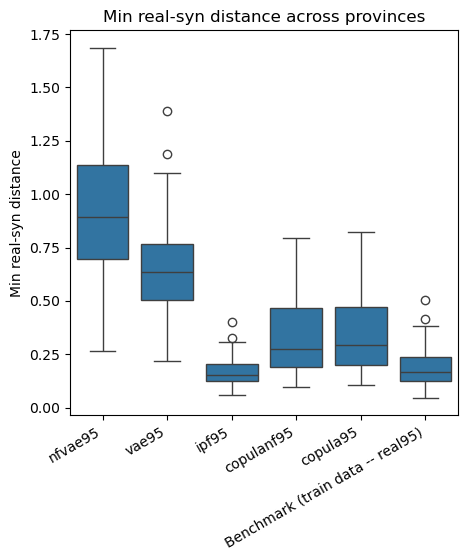

In [23]:
# boxplot function for distances
fig,ax = plt.subplots(1,figsize=(5,5))
sns.boxplot(data=dist.loc[dist.min_distance=='mean'],x='pop_name',y='score',ax=ax)
plt.xticks(rotation=30,ha='right')
ax.set_xlabel("")
ax.set_ylabel("Min real-syn distance")
ax.set_title("Min real-syn distance across provinces")

In [24]:
ratio

,Unnamed: 0,pop_name,distance_ratio,score,prov
0,0,nfvae95,mean_train,0.729466,AG
1,1,vae95,mean_train,0.829959,AG
2,2,ipf95,mean_train,0.620663,AG
3,3,copulanf95,mean_train,0.823001,AG
4,4,copula95,mean_train,0.828367,AG
...,...,...,...,...,...
1055,5,nfvae95,std_train,0.280807,VV
1056,6,vae95,std_train,0.207190,VV
1057,7,ipf95,std_train,0.301145,VV
1058,8,copulanf95,std_train,0.233437,VV


Text(0.5, 1.0, 'Ratio across provinces')

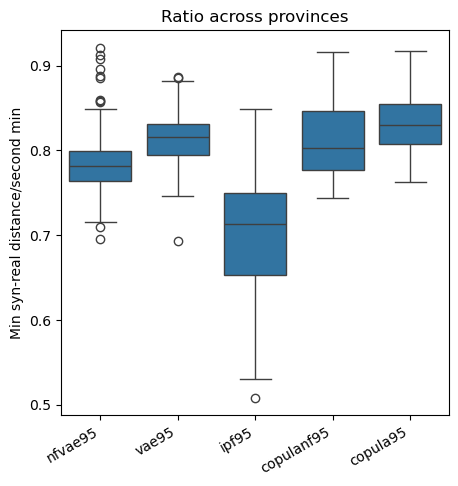

In [25]:
# boxplot for ratio
fig,ax = plt.subplots(1,figsize=(5,5))
sns.boxplot(data=ratio.loc[ratio.distance_ratio=='mean_train'],x='pop_name',y='score',ax=ax)
plt.xticks(rotation=30,ha='right')
ax.set_xlabel("")
ax.set_ylabel("Min syn-real distance/second min")
ax.set_title("Ratio across provinces")

In [26]:
mia_auc_roc

,Unnamed: 0,pop_name,classifier,score,prov
0,0,nfvae95,Logistic Regression,0.644159,AG
1,1,vae95,Logistic Regression,0.714100,AG
2,2,ipf95,Logistic Regression,0.670201,AG
3,3,copulanf95,Logistic Regression,0.701451,AG
4,4,copula95,Logistic Regression,0.607701,AG
...,...,...,...,...,...
3705,30,nfvae95,MLP,0.454225,VV
3706,31,vae95,MLP,0.429577,VV
3707,32,ipf95,MLP,0.308099,VV
3708,33,copulanf95,MLP,0.422535,VV


Text(0.5, 1.0, 'MIA ROC-AUC across provinces')

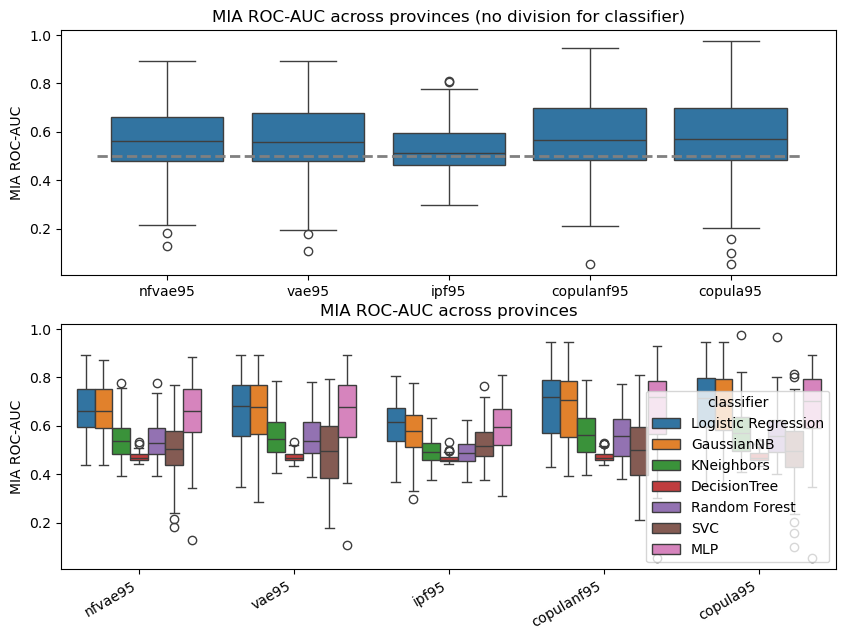

In [44]:
# boxplot for MIA roc auc
fig,axs = plt.subplots(2,figsize=(10,7))
sns.boxplot(data=mia_auc_roc,x='pop_name',y='score',ax=axs[0])
plt.xticks(rotation=30,ha='right')
axs[0].set_xlabel("")
axs[0].set_ylabel("MIA ROC-AUC")
axs[0].set_title("MIA ROC-AUC across provinces (no division for classifier)")
axs[0].hlines(y=0.5,linestyle='--', linewidth=2, color='gray',xmin=-0.5,xmax=4.5)

sns.boxplot(data=mia_auc_roc,x='pop_name',y='score',hue='classifier',ax=axs[1])
plt.xticks(rotation=30,ha='right')
axs[1].set_xlabel("")
axs[1].set_ylabel("MIA ROC-AUC")
axs[1].set_title("MIA ROC-AUC across provinces")

Text(0.5, 1.0, 'MIA PR-AUC across provinces')

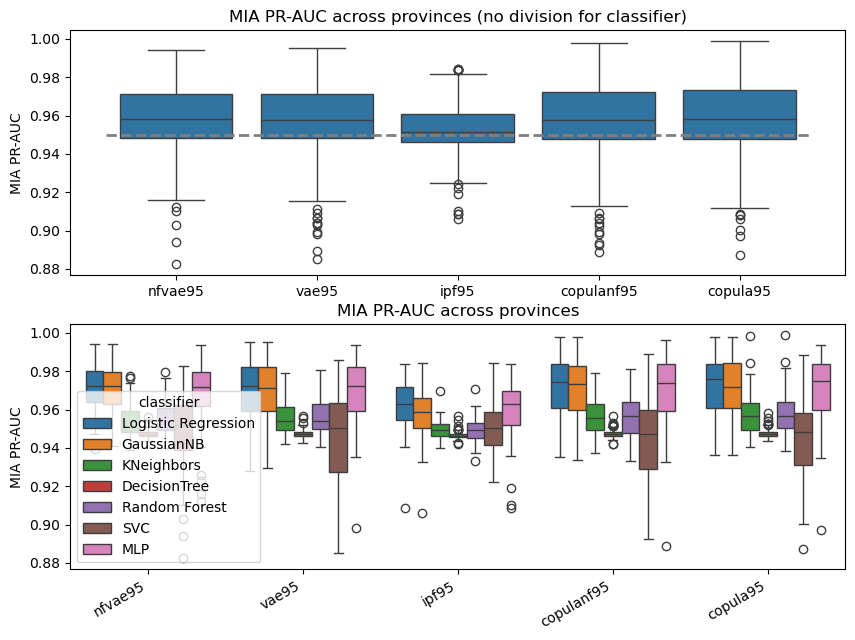

In [45]:
# boxplot for MIA auc pr
fig,axs = plt.subplots(2,figsize=(10,7))
sns.boxplot(data=mia_auc_pr,x='pop_name',y='score',ax=axs[0])
plt.xticks(rotation=30,ha='right')
axs[0].set_xlabel("")
axs[0].set_ylabel("MIA PR-AUC")
axs[0].set_title("MIA PR-AUC across provinces (no division for classifier)")
axs[0].hlines(y=0.95,linestyle='--', linewidth=2, color='gray',xmin=-0.5,xmax=4.5)

sns.boxplot(data=mia_auc_pr,x='pop_name',y='score',hue='classifier',ax=axs[1])
plt.xticks(rotation=30,ha='right')
axs[1].set_xlabel("")
axs[1].set_ylabel("MIA PR-AUC")
axs[1].set_title("MIA PR-AUC across provinces")